# Variables exploration
- Descriptive analysis
- Are the series stationary?
- Is the first differentiation enough to make them stationary?
- Are the series correlated?

In [142]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from config_notebooks.config import set_wd
set_wd()

In [143]:
df = pd.read_excel("./data/data.xlsx",index_col=0)[:"2022-12"]
# df["qi"] = df["pp"] / df["pi"]
df.describe().to_latex("./output/variables_exploration/summary_stats.tex",
                       float_format="{:.1f}".format,
                       decimal=",",
                    #    bold_rows=True,
                       caption="Estadisticas descriptivas de las variables")
df.describe()

C:\Users\marti\AppData\Local\Temp\ipykernel_8600\4129265255.py:3: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



,pp,pi,gap,er_cp,pre
count,216.000000,216.000000,216.000000,216.000000,216.000000
mean,1286.478606,158.564770,1.260930,511.731649,830.260802
std,497.768505,33.003687,0.312866,146.991842,663.264226
min,363.846844,86.226525,0.992771,347.069888,-0.666667
25%,899.685412,137.941036,1.024024,389.735893,250.000000
50%,1205.796953,151.440724,1.097578,472.207579,711.000000
75%,1640.686252,187.239590,1.446759,578.446097,1236.416667
max,2766.352298,223.251026,2.355276,896.478093,3448.000000


In [164]:
df

,pp,pi,gap,er_cp,pre
2005-01-31,508.020737,86.866026,1.154717,896.478093,1423.333333
2005-02-28,500.539941,87.907449,1.160477,872.658808,969.666667
2005-03-31,656.181802,86.226525,1.170062,860.907091,1730.000000
2005-04-30,939.064907,87.964450,1.149008,863.177404,620.000000
2005-05-31,1028.823820,89.117152,1.121609,854.918192,54.666667
...,...,...,...,...,...
2022-08-31,1988.408046,200.959296,2.149003,369.796103,146.666667
2022-09-30,2071.879245,204.883577,2.071033,368.751129,106.666667
2022-10-31,2339.045364,205.876822,2.022584,368.460742,543.333333
2022-11-30,1506.227931,203.938464,1.958168,373.953314,670.000000


In [145]:
from plotly.subplots import make_subplots

# Create subplots, assuming df has 4 variables
fig = make_subplots(rows=3, cols=2)

# Loop over the columns of the DataFrame
for i, variable in enumerate(df.columns):
    # Calculate the row and col index for the subplot
    row = i // 2 + 1
    col = i % 2 + 1
    fig.add_trace(go.Scatter(x=df.index, y=df[variable], mode='lines', name=variable), row=row, col=col)
fig.update_layout(template = None, separators = ",.",
                #   title_text = "Evolución histórica de las variables",
                  legend = dict(orientation = "h", x=.2, y=1.1),
                  margin = dict(t = 0, b=20)
                #   height = 600
                  )
fig.update_yaxes(tickformat = ",")
fig.write_image("./output/variables_exploration/evolucion_historica.pdf")
fig

In [146]:
fig = go.Figure()
for variable in df.columns:
    fig.add_trace(go.Scatter(x = df.index, y =df[variable], name = variable))
fig.update_layout(template = None)

In [147]:
df_yearly = df.groupby(df.index.year).agg({
    "pp":"sum",
    "pi":"mean",
    "gap":"mean",
    "er_cp":"mean",
    "pre":"sum",
    # "qi":"mean"
})

fig = make_subplots(rows=3, cols=2)

# Loop over the columns of the DataFrame
for i, variable in enumerate(df_yearly.columns):
    # Calculate the row and col index for the subplot
    row = i // 2 + 1
    col = i % 2 + 1
    fig.add_trace(go.Scatter(x=df_yearly.index, y=df_yearly[variable], mode='lines + markers',
                             name=variable, marker = dict(symbol = i),
                             ), row=row, col=col,
                  )
fig.update_layout(template = None, separators = ",.",
                #   title_text = "Evolución histórica de las variables",
                  legend = dict(orientation = "h", x=.2, y=1.1),
                  margin = dict(t = 0, b=20)
                #   height = 600
                  )
fig.update_yaxes(tickformat = ",")
fig.write_image("output/variables_exploration/evolucion_historica_anual.pdf")

# Stationarity

In [148]:
def adfuller_test(df:pd.DataFrame,variable:str):
    print("---")
    print("Variable:", variable)
    result = adfuller(df[variable], regression = "ctt") #constant, and linear and quadratic trend.
    adf_statistic = result[0]
    p_value = result[1]

    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {p_value}')

    # Interpret the results
    if p_value <= 0.05:
        print("Reject the null hypothesis: The residual series is stationary.")
    else:
        print("Fail to reject the null hypothesis: The residual series is non-stationary.")
        
print("Original series")  
for variable in df.columns:
    adfuller_test(df,variable)

Original series
---
Variable: pp
ADF Statistic: -3.3104432101679175
p-value: 0.168722705208951
Fail to reject the null hypothesis: The residual series is non-stationary.
---
Variable: pi
ADF Statistic: -1.8600526654950116
p-value: 0.8650979981114992
Fail to reject the null hypothesis: The residual series is non-stationary.
---
Variable: gap
ADF Statistic: -2.2246155646494272
p-value: 0.7179687289722867
Fail to reject the null hypothesis: The residual series is non-stationary.
---
Variable: er_cp
ADF Statistic: -1.8759526095267423
p-value: 0.8601249196615498
Fail to reject the null hypothesis: The residual series is non-stationary.
---
Variable: pre
ADF Statistic: -4.003165414073095
p-value: 0.03122290625031731
Reject the null hypothesis: The residual series is stationary.


<Axes: >

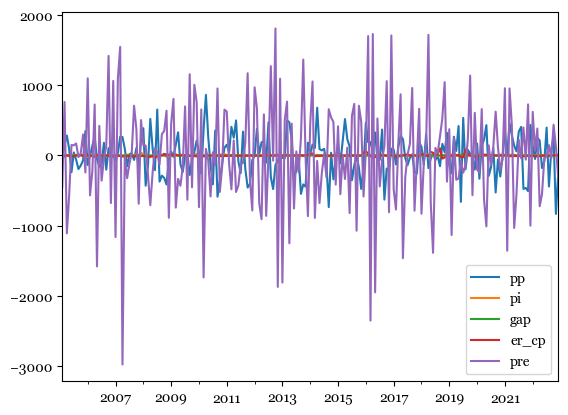

In [149]:
df_diff = df.copy()
df_diff = df_diff.diff().dropna()
df_diff.plot()

In [150]:
print("Differentiated series") 
for variable in df_diff.columns:  
    adfuller_test(df_diff,variable)

Differentiated series
---
Variable: pp
ADF Statistic: -5.483053092638698
p-value: 0.00013691433695019986
Reject the null hypothesis: The residual series is stationary.
---
Variable: pi
ADF Statistic: -8.120562889254538
p-value: 1.7003778004873456e-10
Reject the null hypothesis: The residual series is stationary.
---
Variable: gap
ADF Statistic: -11.107977084825384
p-value: 1.352950565652694e-17
Reject the null hypothesis: The residual series is stationary.
---
Variable: er_cp
ADF Statistic: -4.165649580797571
p-value: 0.01930013698110614
Reject the null hypothesis: The residual series is stationary.
---
Variable: pre
ADF Statistic: -9.981355304394278
p-value: 5.050571224785326e-15
Reject the null hypothesis: The residual series is stationary.


In [151]:
df_stationary = df[["pre"]].merge(df_diff.drop("pre",axis=1), left_index=True, right_index=True)
df_stationary

,pre,pp,pi,gap,er_cp
2005-02-28,969.666667,-7.480796,1.041423,0.005760,-23.819285
2005-03-31,1730.000000,155.641861,-1.680925,0.009585,-11.751717
2005-04-30,620.000000,282.883105,1.737925,-0.021054,2.270313
2005-05-31,54.666667,89.758913,1.152702,-0.027399,-8.259212
2005-06-30,203.000000,-239.274712,5.601247,-0.011645,-11.517106
...,...,...,...,...,...
2022-08-31,146.666667,-443.010362,-7.908439,-0.206273,-5.495015
2022-09-30,106.666667,83.471199,3.924281,-0.077971,-1.044974
2022-10-31,543.333333,267.166119,0.993245,-0.048449,-0.290387
2022-11-30,670.000000,-832.817433,-1.938358,-0.064416,5.492572


# Correlation

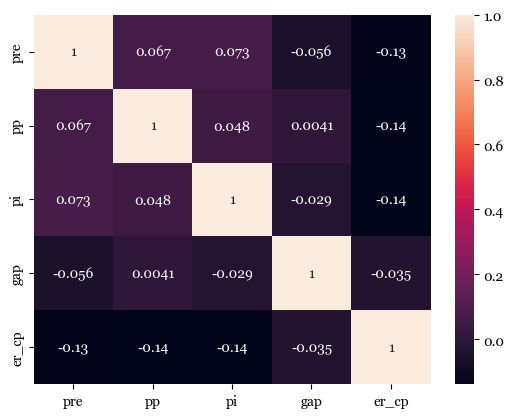

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
ax = sns.heatmap(df_stationary.corr(method="spearman"), annot=True)

# Set the font family
plt.rcParams['font.family'] = 'Georgia'

# Save the plot to a PDF file
# plt.savefig('./output/variables_exploration/correlation.pdf')

plt.show()

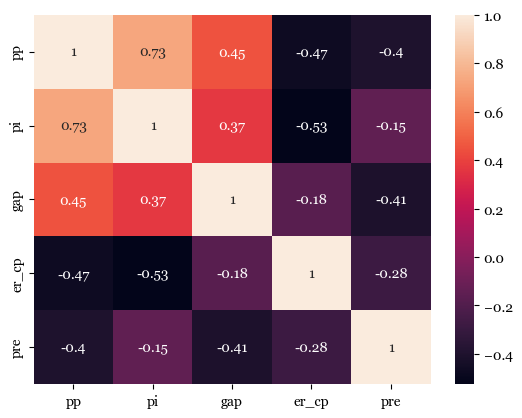

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(df_yearly.corr(method="spearman"), annot=True)
plt.rcParams['font.family'] = 'Georgia'
plt.savefig('./output/variables_exploration/correlation.pdf')

plt.show()

In [154]:
import plotly.express as px

# fig = px.scatter_matrix(df_yearly.reset_index(), hover_data=['index'])
fig = px.scatter_matrix(df_yearly)
fig.update_layout(template = None, font_family = "georgia", margin = dict(t=0,b=35,l=40, r=0))
fig.write_image('./output/variables_exploration/correlation_scatter.pdf')
fig


c:\Users\marti\anaconda3\envs\my-proj\Lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [163]:
import statsmodels.api as sm
from stargazer.stargazer import Stargazer

feautures = ["pre","pi","gap","er_cp"]
models = []
for i, feature in enumerate(feautures):
    X = df_yearly[feautures[:i+1]]
    X = sm.add_constant(X)
    model = sm.OLS(endog=df_yearly["pp"], exog=X).fit()
    model = model.get_robustcov_results()
    models.append(model)
    
stargazer = Stargazer(models)
tex_file = open( f"output/variables_exploration/mr.tex", "w" ) #This will overwrite an existing file
tex_file.write( stargazer.render_latex())
tex_file.close()

In [155]:
# def subplot_descomposicion(decomposition: statsmodels.tsa.seasonal.DecomposeResult):
            
#     analisis_estructural = make_subplots(rows=4, cols=1)

#     analisis_estructural.add_trace(
#         go.Scatter(x = decomposition.observed.index, y = decomposition.observed, name = "Original"), row = 1, col=1
#     )

#     analisis_estructural.add_trace(
#         go.Scatter(x = decomposition.trend.index, y = decomposition.trend, name = "Tendencia"), row = 2, col=1
#     )

#     analisis_estructural.add_trace(
#         go.Scatter(x = decomposition.seasonal.index, y = decomposition.seasonal, mode = "lines", name = "Estacionalidad"), row=3, col=1
#     )

#     analisis_estructural.add_trace(
#                 go.Scatter(x = decomposition.resid.index, y = decomposition.resid, mode = "markers", name="Residuos"), row=4, col=1
#                 )

#     analisis_estructural.update_layout(template=None,separators=",.",font_family="georgia",
#                                        title_text = f"Prueba de los componentes: Tendencia, estacionalidad y residuos<br><sup>En millones de US$", height=600)
#     analisis_estructural.update_yaxes(tickformat = ",")
#     return analisis_estructural
# subplot_descomposicion(decomposition)
# subplot_descomposicion(decomposition).write_html("../output/tendencia-estacionalidad.html")
# subplot_descomposicion(decomposition).write_image("../output/tendencia-estacionalidad.pdf")